# **GRIP** - **THE SPARKS FOUNDATION**<br>
# Role : Data Science and Business Analytics [Batch May-2021]

## Table of Contents<br>
> - 1. Introduction.
- 2. Importing dependencies.
- 3. Data Loading.
- 4. Understanding data
- 5. Spliting data in Test and Train.
- 6. Use Smiple Linear Regression Model to do prediction.
- 7. Perfrom Task.
- 8. Evaluate the model using MAE and MSE metrics.
- 9. Conslusion.

## **Introduction**<br>
● We have given Student dataset,In which we have only two feature Hours and scores.<br>
● Predict the percentage of an student based on the no. of study hours.<br>
● This is a simple linear regression task as it involves just 2 variables.<br>
● You can use R, Python, SAS Enterprise Miner or any other tool<br>
● Data can be found at http://bit.ly/w-data

## **Importing dependencies**

In [ ]:
#importing packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

## **Data Loading**

In [ ]:
#importing datasets
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

## **Understanding data**

In [ ]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
data.shape #25 records and 2 feature

(25, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Observation :<br>
 - In data there is not having any missing and null value , don't have to do data preprocessing

## **Data Visualization**

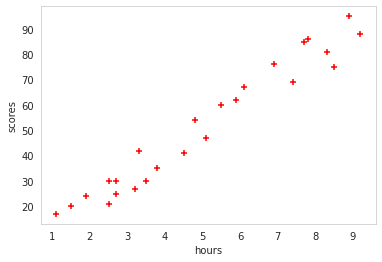

In [ ]:
plt.xlabel('hours')
plt.ylabel('scores')
plt.scatter(x,y,color='red',marker='+')
plt.grid()
plt.show()

In [ ]:
 x = data.iloc[:,:-1].values  #spliting data in X & Y
y = data.iloc[:,-1].values
print(x)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


## **Spliting data in x_train , x_test and y_train , y_test**

In [ ]:
from sklearn.model_selection import train_test_split  #spliting data in x_train , x_test & y_train,y_test 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 0)

## **Apply Logistic Regression on train data**

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

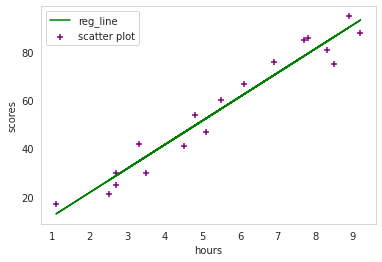

In [ ]:
plt.xlabel('hours')
plt.ylabel('scores')
plt.scatter(x_train,y_train,color='purple',marker='+',label='scatter plot')
plt.plot(x_train,lin_reg.predict(x_train),color='green',label='reg_line')
plt.legend()
plt.grid()
plt.show()

## **Apply Logistic Regression on test data**

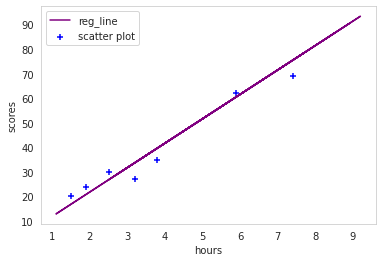

In [ ]:
plt.xlabel('hours')
plt.ylabel('scores')
plt.scatter(x_test,y_test,color='blue',marker='+',label='scatter plot')
plt.plot(x_train,lin_reg.predict(x_train),color='purple',label='reg_line')
plt.legend()
plt.grid()
plt.show()

###**coefficents and y-intercept**

In [ ]:
print('coefficents : ',lin_reg.coef_)
print('y-intercept : ',lin_reg.intercept_)

coefficents :  [9.94167834]
y-intercept :  1.9322042531516601


In [ ]:
y_pred = lin_reg.predict(x_test)
y_pred

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

## Comparing Actual value with Predicted value

In [ ]:
result = pd.DataFrame({'Actual values':y_test,'Predicted values':y_pred})
result

,Actual values,Predicted values
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


In [ ]:
diff = np.array(np.abs(y_test-y_pred))
diff

array([3.15527824, 6.74557494, 6.50062397, 3.2135999 , 1.41189354,
       4.71058194, 3.1786069 ])

## Displot distribution of Actual value with Predicted value

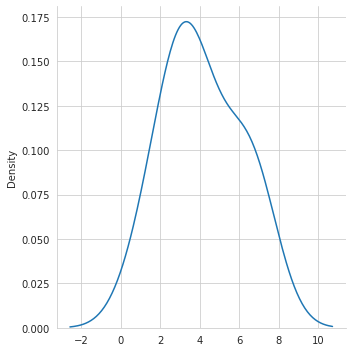

In [ ]:
sns.set_style('whitegrid')
sns.displot(diff,kind='kde')
plt.show()

# **Task**
## - What will be predicted score if a student studies for 9.25 hrs/ day?

In [ ]:
import math
# y = mx + c
res = lin_reg.intercept_+9.25*lin_reg.coef_
hr= 9.25
print("If student study for {} hrs/day student will get {}% score in exam".format(hr,math.floor(res[0])))

If student study for 9.25 hrs/day student will get 93% score in exam


## MAE :
 - MAE measures the differences between prediction and actual observation.<br>
 Formula is :<br>
 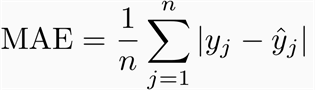

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.130879918502482


## MSE :
- MSE simply refers to the mean of the squared difference between the predicted value and the observed value.<br>
Formula : <br>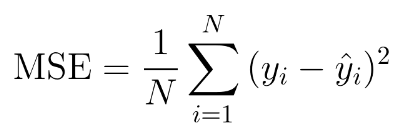

In [ ]:
from sklearn import metrics  
print('Mean Squared Error:', 
      metrics.mean_squared_error(y_test, y_pred)) 

Mean Absolute Error: 20.33292367497996


##**R-Square** :
 - R-squared is  measure of how close the data are to the fitted regression line.<br>
 Formula : <br>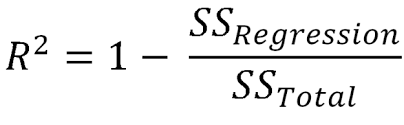

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9367661043365056

## **Conclusion :**<br>
- We have successfully created a Simple linear Regression model to predict score of the student given number of hours one studies.
- By the MAE and MSE , we are not getting much difference in actual or predicted value , means error is less.
- The Score of R-Square **0.93** quite close to **1**.